In [1]:
# Import Libraries
import pandas as pd
import plotly.express as px

import os
from pathlib import Path
from dotenv import load_dotenv

In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("access_token")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

In [3]:
# import Chicagos data
chicago = pd.read_csv(r'..\project1\Data\Crimes_-_2001_to_Present.csv')
# chicago.head()

# import Philies data
philly = pd.read_csv (r'..\project1\Data\incidents_part1_part2.csv')
# philly.head()

# import San Francisco
san_fran= pd.read_csv(r'..\project1\Data\Police_Department_Incident_Reports__2018_to_Present.csv')
# san_fran.head()

In [23]:
chicago['Primary Type'].value_counts().head(10)

THEFT                  1572459
BATTERY                1370636
CRIMINAL DAMAGE         852127
NARCOTICS               740200
ASSAULT                 480616
OTHER OFFENSE           464467
BURGLARY                414768
MOTOR VEHICLE THEFT     345410
DECEPTIVE PRACTICE      322269
ROBBERY                 280948
Name: Primary Type, dtype: int64

In [24]:
philly['text_general_code'].value_counts().head(10)

All Other Offenses                541189
Other Assaults                    386860
Thefts                            363866
Vandalism/Criminal Mischief       268764
Theft from Vehicle                232212
Narcotic / Drug Law Violations    173469
Fraud                             162198
Burglary Residential              115425
Aggravated Assault No Firearm      93942
Motor Vehicle Theft                65421
Name: text_general_code, dtype: int64

In [31]:
san_fran['Original Crime Type Name'].value_counts().head(10)

Passing Call           591426
Traffic Stop           310457
Suspicious Person      173880
Homeless Complaint     157596
PASSING CALL           136905
Traf Violation Cite    136065
22500e                 116715
Audible Alarm          106109
Muni Inspection        100436
Well Being Check        99076
Name: Original Crime Type Name, dtype: int64

In [4]:
# Ensure all 7m records found
print(len(chicago.index))

7471955


In [5]:
# Filter for thefts on the porch
df_chicago_porch_pirates = chicago[(chicago["Primary Type"]=="THEFT") & (chicago["Location Description"]=="RESIDENCE PORCH/HALLWAY")]
df_chicago_porch_pirates.head()

ID Case Number                    Date  \
729   10225608    HY412877  09/06/2015 12:20:00 PM   
1159  10226095    HY413480  09/04/2015 08:00:00 AM   
1359  11243511    JB168893  02/20/2018 04:21:00 PM   
1390  10226388    HY413849  08/18/2015 10:00:00 AM   
1559  10226571    HY412905  09/06/2015 03:30:00 PM   

                            Block  IUCR Primary Type     Description  \
729   024XX W LITHUANIAN PLAZA CT  0820        THEFT  $500 AND UNDER   
1159           030XX N HAMLIN AVE  0820        THEFT  $500 AND UNDER   
1359         005XX W ARLINGTON PL  0820        THEFT  $500 AND UNDER   
1390           063XX S RACINE AVE  0820        THEFT  $500 AND UNDER   
1559             027XX N CLARK ST  0820        THEFT  $500 AND UNDER   

         Location Description  Arrest  Domestic  ...  Longitude  \
729   RESIDENCE PORCH/HALLWAY   False     False  ... -87.684976   
1159  RESIDENCE PORCH/HALLWAY   False     False  ... -87.721462   
1359  RESIDENCE PORCH/HALLWAY   False     False  ...        NaN   
1390  RESIDENCE PORCH/HALLWAY   False     False  ... -87.654484   
1559  RESIDENCE PORCH/HALLWAY   False     False  ... -87.644367   

                           Location  Historical Wards 2003-2015  Zip Codes  \
729   (41.768308395, -87.684976205)                        44.0    21867.0   
1159  (41.936084101, -87.721462368)                        27.0    21538.0   
1359                            NaN                         NaN        NaN   
1390  (41.778821299, -87.654483974)                        19.0    22257.0   
1559  (41.931495367, -87.644367168)                        51.0    21190.0   

     Community Areas  Census Tracts  Wards  Boundaries - ZIP Codes  \
729             64.0          383.0   31.0                    58.0   
1159            22.0          215.0   21.0                    39.0   
1359             NaN            NaN    NaN                     NaN   
1390            65.0           21.0    2.0                    23.0   
1559            68.0          794.0   34.0                    16.0   

     Police Districts  Police Beats  
729              13.0         207.0  
1159              6.0         175.0  
1359              NaN           NaN  
1390             17.0         203.0  
1559              5.0         178.0  

[5 rows x 30 columns]

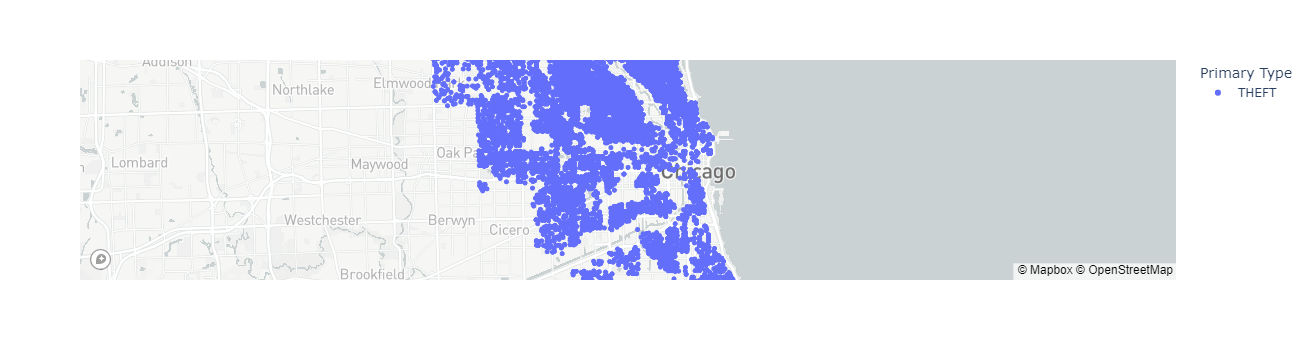

In [14]:
map_1 = px.scatter_mapbox(
    df_chicago_porch_pirates,
    lat="Latitude",
    lon="Longitude",
    color="Primary Type",
    zoom=10,
)
map_1.show()

In [12]:
# Filter for thefts on the porch
df_philly_theft = philly[(philly["text_general_code"]=="Thefts") | (philly["text_general_code"]=="Theft from Vehicle")]
df_philly_theft.head()

the_geom  \
0   0101000020E6100000EA77405D0DC952C016F8ED98F8FA...   
2   0101000020E6100000EA77405D0DC952C016F8ED98F8FA...   
3   0101000020E6100000EA77405D0DC952C016F8ED98F8FA...   
7   0101000020E61000002FD31F2F1ECE52C07129BE0C0CF5...   
10  0101000020E61000002FD31F2F1ECE52C07129BE0C0CF5...   

                                 the_geom_webmercator  objectid  dc_dist psa  \
0   0101000020110F000080BB90BAA8E85FC1EC88B8A8528A...       107        6   1   
2   0101000020110F000080BB90BAA8E85FC1EC88B8A8528A...       109        6   1   
3   0101000020110F000080BB90BAA8E85FC1EC88B8A8528A...       110        6   1   
7   0101000020110F0000401FFA8143F15FC1160AD2D2C283...       114       12   E   
10  0101000020110F0000401FFA8143F15FC1160AD2D2C283...       117       12   1   

     dispatch_date_time dispatch_date dispatch_time  hour_        dc_key  \
0   2013-05-28 09:43:00    2013-05-28      09:43:00    9.0  201306025636   
2   2013-12-16 13:10:00    2013-12-16      13:10:00   13.0  201306064336   
3   2014-01-27 13:12:00    2014-01-27      13:12:00   13.0  201406003790   
7   2007-01-25 22:00:00    2007-01-25      22:00:00   22.0  200712007701   
10  2018-01-06 10:56:00    2018-01-06      10:56:00   10.0  201812001185   

                  location_block  ucr_general text_general_code    point_x  \
0   N 02ND ST / SPRING GARDEN ST          600            Thefts -75.141441   
2   N 02ND ST / SPRING GARDEN ST          600            Thefts -75.141441   
3   N 02ND ST / SPRING GARDEN ST          600            Thefts -75.141441   
7        6600 BLOCK ESSINGTON AV          600            Thefts -75.220592   
10      6600 BLOCK ESSINGTON AVE          600            Thefts -75.220592   

      point_y        lat        lng  
0   39.960712  39.960712 -75.141441  
2   39.960712  39.960712 -75.141441  
3   39.960712  39.960712 -75.141441  
7   39.914430  39.914430 -75.220592  
10  39.914430  39.914430 -75.220592

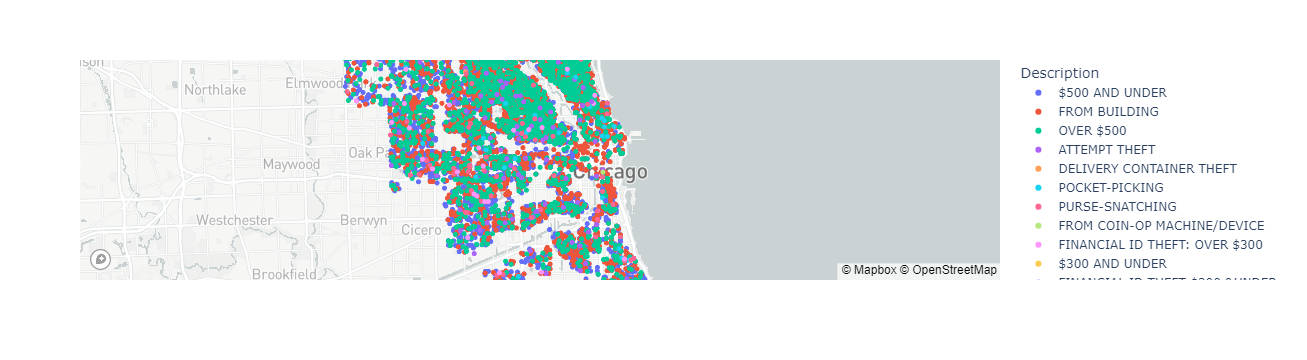

In [15]:
map_2 = px.scatter_mapbox(
    df_chicago_porch_pirates,
    lat="Latitude",
    lon="Longitude",
    color="Description",
    zoom=10
)
map_2.show()

In [25]:
san_fran.head()

Crime Id Original Crime Type Name Report Date   Call Date Offense Date  \
0  161080584                     Poss  04/17/2016  04/17/2016   04/17/2016   
1  190123549                      Rep  01/12/2019  01/12/2019   01/12/2019   
2  161100690                      911  04/19/2016  04/19/2016   04/19/2016   
3  193040567      Traf Violation Cite  10/31/2019  10/31/2019   10/31/2019   
4  193041338      Traf Violation Cite  10/31/2019  10/31/2019   10/31/2019   

  Call Time          Call Date Time Disposition                   Address  \
0     05:23  04/17/2016 05:23:00 AM         NOM      0 Block Of Evelyn Wy   
1     20:36  01/12/2019 08:36:00 PM         HAN      600 Block Of Eddy St   
2     07:45  04/19/2016 07:45:00 AM         ADV  1700 Block Of Jerrold Av   
3     07:34  10/31/2019 07:34:00 AM         GOA   2400 Block Of Phelps St   
4     10:35  10/31/2019 10:35:00 AM         GOA  1400 Block Of Carroll Av   

            City State  Agency Id     Address Type Common Location  
0  San Francisco    CA          1  Premise Address             NaN  
1  San Francisco    CA          1  Premise Address             NaN  
2  San Francisco    CA          1  Premise Address             NaN  
3  San Francisco    CA          1  Premise Address             NaN  
4  San Francisco    CA          1  Premise Address             NaN

In [ ]:
san_fran.count()

In [16]:
new_chicagodf = df_chicago_porch_pirates.groupby('Description')

In [18]:
new_chicagodf.head()

ID Case Number                    Date  \
729      10225608    HY412877  09/06/2015 12:20:00 PM   
1159     10226095    HY413480  09/04/2015 08:00:00 AM   
1359     11243511    JB168893  02/20/2018 04:21:00 PM   
1390     10226388    HY413849  08/18/2015 10:00:00 AM   
1559     10226571    HY412905  09/06/2015 03:30:00 PM   
...           ...         ...                     ...   
3446188   4645271    HM233994  03/01/2006 01:00:00 PM   
4338646   5999110    HP102648  01/02/2008 02:30:00 PM   
4620382   6566134    HP639302  12/03/2007 12:00:00 AM   
4755513   6670539    HP743137  08/26/2008 12:00:00 PM   
5856452   8589148    HV263554  04/27/2012 09:30:00 AM   

                               Block  IUCR Primary Type  \
729      024XX W LITHUANIAN PLAZA CT  0820        THEFT   
1159              030XX N HAMLIN AVE  0820        THEFT   
1359            005XX W ARLINGTON PL  0820        THEFT   
1390              063XX S RACINE AVE  0820        THEFT   
1559                027XX N CLARK ST  0820        THEFT   
...                              ...   ...          ...   
3446188          005XX S DEARBORN ST  0895        THEFT   
4338646            003XX W NORTH AVE  0843        THEFT   
4620382         049XX N WINTHROP AVE  0842        THEFT   
4755513          118XX S SANGAMON ST  0843        THEFT   
5856452           002XX S ALBANY AVE  0842        THEFT   

                              Description     Location Description  Arrest  \
729                        $500 AND UNDER  RESIDENCE PORCH/HALLWAY   False   
1159                       $500 AND UNDER  RESIDENCE PORCH/HALLWAY   False   
1359                       $500 AND UNDER  RESIDENCE PORCH/HALLWAY   False   
1390                       $500 AND UNDER  RESIDENCE PORCH/HALLWAY   False   
1559                       $500 AND UNDER  RESIDENCE PORCH/HALLWAY   False   
...                                   ...                      ...     ...   
3446188       FROM COIN-OP MACHINE/DEVICE  RESIDENCE PORCH/HALLWAY   False   
4338646  ATTEMPT FINANCIAL IDENTITY THEFT  RESIDENCE PORCH/HALLWAY   False   
4620382           AGG: FINANCIAL ID THEFT  RESIDENCE PORCH/HALLWAY   False   
4755513  ATTEMPT FINANCIAL IDENTITY THEFT  RESIDENCE PORCH/HALLWAY   False   
5856452           AGG: FINANCIAL ID THEFT  RESIDENCE PORCH/HALLWAY   False   

         Domestic  ...  Longitude                       Location  \
729         False  ... -87.684976  (41.768308395, -87.684976205)   
1159        False  ... -87.721462  (41.936084101, -87.721462368)   
1359        False  ...        NaN                            NaN   
1390        False  ... -87.654484  (41.778821299, -87.654483974)   
1559        False  ... -87.644367  (41.931495367, -87.644367168)   
...           ...  ...        ...                            ...   
3446188     False  ... -87.629221  (41.875154958, -87.629220565)   
4338646     False  ... -87.636904   (41.91114034, -87.636904049)   
4620382     False  ... -87.657710   (41.972326185, -87.65771014)   
4755513     False  ... -87.645603  (41.678941263, -87.645603412)   
5856452     False  ... -87.703584  (41.877966077, -87.703583783)   

         Historical Wards 2003-2015  Zip Codes Community Areas  Census Tracts  \
729                            44.0    21867.0            64.0          383.0   
1159                           27.0    21538.0            22.0          215.0   
1359                            NaN        NaN             NaN            NaN   
1390                           19.0    22257.0            65.0           21.0   
1559                           51.0    21190.0            68.0          794.0   
...                             ...        ...             ...            ...   
3446188                        48.0    14913.0            38.0           92.0   
4338646                        51.0    21190.0            68.0          271.0   
4620382                        40.0    22616.0            31.0          634.0   
4755513                        45.0    22212.0           